<a href="https://colab.research.google.com/github/Jimin980921/Do-it_DeepLearning/blob/master/Do_it_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SingleLayer 클래스에 배치 경사 하강법 사용하기

In [0]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()
x=cancer.data
y=cancer.target
x_train_all,x_test,y_train_all,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train_all,y_train_all,stratify=y_train_all,test_size=0.2,random_state=42)

In [0]:
print(x_train.shape,x_val.shape)

(364, 30) (91, 30)


# **그레디언트 계산**

그레디언트=오차,입력데이터의 곱

# forpass(),backprop()메서드에 배치 경사 하강법 적용

In [0]:
def init(self,learning_rate=0.1,l1=0,l2=0):
  self.w=None
  self.b=None
  self.losses=[]
  self.val_losses=[]
  self.w_history=[]
  self.lr=learning_rate
  self.l1=l1
  self.l2=l2


In [0]:
def forpass(self,x):
  z=np.dot(x,self.w)+self.b
  return z

def backprop(self,x,err):
  m=len(x)
  w_grad=np.dot(x.T,err)/m  #행렬곱셈을 적용한 결과가 그레디언트의 합이므로 전체 샘플 개수로 나눠서 구함
  b_grad=np.sum(err)/m
  return x_grad,b_grad

def activation(self,z):
  a=1/(1+np.exp(-z))
  return a
  

# **fit메서드**

전체샘플을 한꺼번에 계산하기때문에 for문 삭제

In [0]:
def fit(self,x,y,ephocs=100,x_val=None,y_val=None):
  y=y.reshape(-1,1)   #타깃을 열 벡터로 바꿉니다.
  y_val=y_val.reshape(-1,1)
  m=len(x)
  self.w=np.ones((x.shape[1],1))
  self.b=0
  self.w_history.appen(self.w.copy())

  for i in range(epochs):
    z=self.forpass(x)
    a=self.activation(z)
    err=-(y-a)
    w_grad,b_grad=self.backprop(x,err)
    w_grad+=(self.l1*np.sign(self.w)+self.l2*self.w)/m

    #가중치와 절편 업데이트
    self.w-=self.lr*w_grad
    self.b-=self.lr*b_grad
    #가중치 기록
    self.w_history.append(self.w.copy())
    a=np.clip(a,1e-10,1-1e-10)
    #로그손실,규제 손실 더해서 리스트에 추가
    loss=np.sum(-(y*np.log(a)+(1-y)*np.log(1-a)))
    self.losses.append((loss+self.reg_loss())/m)
    #검증세트에대한 손실 계산
    self.update_val_loss(x_val,y_val)


In [0]:
def predict(self,x):
  z=self.forpass(x)
  return z>0

def update_val_loss(self,x_val,y_val):
  z=self.forpass(x_val)
  a=self.activation(z)
  a=np.clip(a,1e-10,1-1e-10)
  val_loss=np.sum(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
  self.val_losses.append((val_loss+self.reg_loss())/len(y_val))

In [0]:
def score(self,x,y):
  return np.mean(self.predict(x)==y.reshape(-1,1))

def reg_loss(self): #가중치에 규제를 정함.
  return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)

# 합치기

In [0]:
class SingleLayer:
  def __init__(self,learning_rate=0.1,l1=0,l2=0):
    self.w=None
    self.b=None
    self.losses=[]
    self.val_losses=[]
    self.w_history =[]
    self.lr=learning_rate
    self.l1=l1
    self.l2=l2

  def forpass(self,x):
    z=np.dot(x,self.w)+self.b
    return z

  def backprop(self,x,err):
    m=len(x)
    w_grad=np.dot(x.T,err)/m  #행렬곱셈을 적용한 결과가 그레디언트의 합이므로 전체 샘플 개수로 나눠서 구함
    b_grad=np.sum(err)/m
    return w_grad,b_grad

  def activation(self,z):
    a=1/(1+np.exp(-z))
    return a

  def fit(self,x,y,epochs=100,x_val=None,y_val=None):
    y=y.reshape(-1,1)   #타깃을 열 벡터로 바꿉니다.
    y_val=y_val.reshape(-1,1)
    m=len(x)
    self.w=np.ones((x.shape[1],1))
    self.b=0
    self.w_history.append(self.w.copy())

    for i in range(epochs):
      z=self.forpass(x)
      a=self.activation(z)
      err=-(y-a)
      w_grad,b_grad=self.backprop(x,err)
      w_grad+=(self.l1*np.sign(self.w)+self.l2*self.w)/m

      #가중치와 절편 업데이트
      self.w-=self.lr*w_grad
      self.b-=self.lr*b_grad
      #가중치 기록
      self.w_history.append(self.w.copy())
      a=np.clip(a,1e-10,1-1e-10)
     #로그손실,규제 손실 더해서 리스트에 추가
      loss=np.sum(-(y*np.log(a)+(1-y)*np.log(1-a)))
      self.losses.append((loss+self.reg_loss())/m)
      #검증세트에대한 손실 계산
      self.update_val_loss(x_val,y_val)

  def predict(self,x):
    z=self.forpass(x)
    return z>0

  def update_val_loss(self,x_val,y_val):
    z=self.forpass(x_val)
    a=self.activation(z)
    a=np.clip(a,1e-10,1-1e-10)
    val_loss=np.sum(-(y_val*np.log(a)+(1-y_val)*np.log(1-a)))
    self.val_losses.append((val_loss+self.reg_loss())/len(y_val))

  def score(self,x,y):
    return np.mean(self.predict(x)==y.reshape(-1,1))

  def reg_loss(self): #가중치에 규제를 정함.
    return self.l1*np.sum(np.abs(self.w))+self.l2/2*np.sum(self.w**2)

# 훈련 데이터 표준화 전처리

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_val_scaled=scaler.transform(x_val)

In [6]:
single_layer=SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled,y_train,x_val=x_val_scaled,y_val=y_val,epochs=10000)
single_layer.score(x_val_scaled,y_val)


0.978021978021978

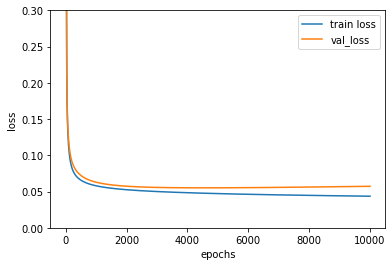

In [7]:
plt.ylim(0,0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train loss','val_loss'])
plt.show()

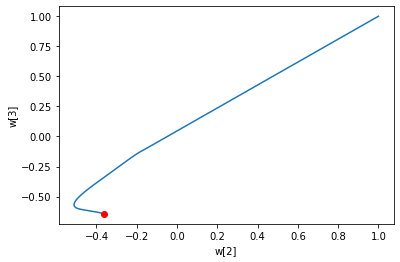

In [8]:
w2=[]
w3=[]

for w in single_layer.w_history:
  w2.append(w[2])
  w3.append(w[3])
plt.plot(w2,w3)
plt.plot(w2[-1],w3[-1],'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()
